In [37]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot

        Date  Sale
0  3/01/2013  4327
1  4/01/2013  4486
2  5/01/2013  4997
3  7/01/2013  7176
4  8/01/2013  5580


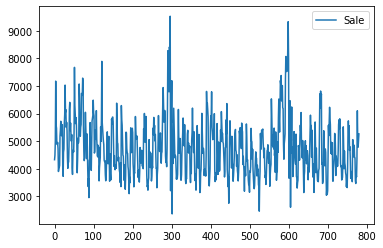

In [28]:
file = "C:/Users/gurpr/Videos/BetaSci/Rossmann_Store1_Data_FULL.csv"
pwd = os.getcwd()
os.chdir(os.path.dirname(file))
series = pd.read_csv(os.path.basename(file)) #, index_col='Date', parse_dates=True)
print(series.head())
series.plot()
#fig = pyplot.figure(figsize=(20, 8))
pyplot.show()

In [29]:
#split data into train and test set 70-30
test = series.iloc[:-(int(len(series.index)*0.75))]
train = series.iloc[-(int(len(series.index)*0.75)):]
train_y = train.iloc[:,-1]
test_y = test.iloc[:,-1]
print('train_length:',train.shape, '\n test_length:', test.shape,
      '\n train_length_y:', train_y.shape,'\n test_length_y:', test_y.shape)

train_length: (585, 2) 
 test_length: (195, 2) 
 train_length_y: (585,) 
 test_length_y: (195,)


In [30]:
print(train_y.head)
print(test_y.head)

<bound method NDFrame.head of 195    5482
196    5156
197    4583
198    4804
199    5469
       ... 
775    6102
776    5011
777    4782
778    5020
779    5263
Name: Sale, Length: 585, dtype: int64>
<bound method NDFrame.head of 0      4327
1      4486
2      4997
3      7176
4      5580
       ... 
190    3492
191    3096
192    3703
193    3493
194    4752
Name: Sale, Length: 195, dtype: int64>


In [31]:
#Moving average
rolling = series.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))

          Sale
0          NaN
1          NaN
2  4603.333333
3  5553.000000
4  5917.666667
5  6075.666667
6  5314.333333
7  5081.333333
8  4908.333333
9  4850.000000


In [32]:
#Change NaN to 0
rolling_mean['Sale'] = rolling_mean['Sale'].fillna(0)
rolling_mean.fillna(0)


,Sale
0,0.000000
1,0.000000
2,4603.333333
3,5553.000000
4,5917.666667
...,...
775,4724.000000
776,5159.000000
777,5298.333333
778,4937.666667


<ipython-input-35-e7186e7bd95f>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  out = rolling_mean.astype(np.int)


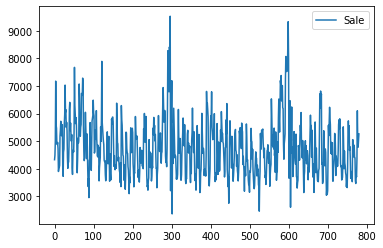

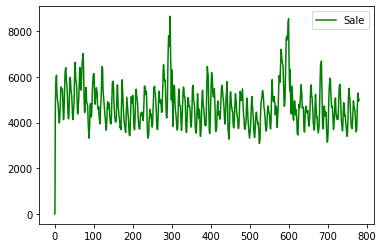

In [35]:
#Write moving average to csv file
out = rolling_mean.astype(np.int)
out.round()
out.to_csv(r'C:\Users\gurpr\Videos\BetaSci\moving_avg_pred_window3.csv', index=False, header=True)
series.plot()
rolling_mean.plot(color='green')
pyplot.show()
